# Passing data model

In this section we will be exploring the passing data model.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import data_visuals as dv
import database as db


### Previous Data Histogram

We will first see the previous data histogram.

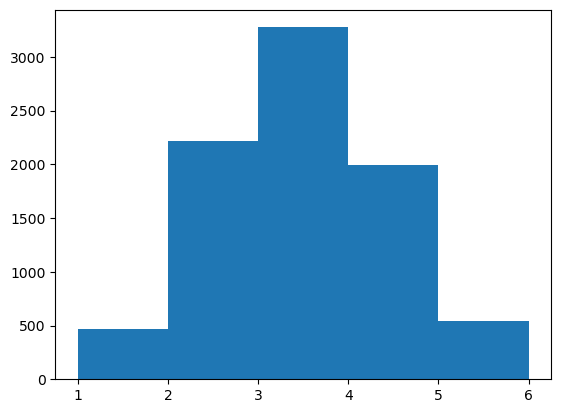

count    8503.000000
mean        2.991532
std         0.986941
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: RatePassing, dtype: float64

In [37]:
apba = db.load_all_apba()

dv.data_histogram(apba, 'RatePassing', 5)

apba['RatePassing'].describe()

# Passing Exploration

I am choosing to isolate the following variables for passing.
1. On Ice shooting percentage (good passers should raise this)
2. Expected Goals vs Goals differential (again good passers will outperform expected goals because they will attack the fundamental problem with the expected goals model).
3. Goals per 60
4. Expected Goals per 60
5. Assists per 60

In [3]:
# set up the data set

real_data = db.load_hr(['14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '22-23'])
real_data.head()

real_data.columns

Index(['Player', 'Age', 'Tm', 'Pos', 'GP', 'G', 'A', 'PTS', 'PlusMin', 'PIM',
       'PS', 'G-EV', 'G-PP', 'G-SH', 'G-GW', 'A-EV', 'A-PP', 'A-SH', 'SOG',
       'ShotPerc', 'TOI', 'ATOI', 'BLK', 'HIT', 'FOW', 'FOL', 'FOPerc', 'UID',
       'season', 'CorsiFor', 'CorsiAgainst', 'CorsiForPerc', 'CorsiForPercRel',
       'FenwickF', 'FenwickA', 'FenwickPerc', 'FenwickPercRel',
       'TeamOnIceShootPerc', 'TeamOnIceSavePerc', 'ShootPercPlusSavePerc',
       'OZoneStartPerc', 'DZoneStartPerc', 'ATOIEV', 'TakeAways', 'GiveAways',
       'EPlusMin', 'ShotAttempts', 'ShotThruPerc', 'GoalsCreated', 'GPerGame',
       'APerGame', 'PtsPerGame', 'GoalsCreatedPerGame', 'SOGPerGameAdjusted',
       'GAdjusted', 'AAdjusted', 'PtsAdjusted', 'GCAdjusted', 'TotGF',
       'TotPPGF', 'TotGA', 'TotPPGA', 'XGF', 'XGA', 'XPlusMin', 'OPS', 'DPS',
       'TotPS', 'ShootoutMiss', 'ShiftLength', 'CorsiForRelES', 'GFPer60',
       'GAPer60', 'ATOIPP', 'PPCorsiPercRel', 'PPGFPer60', 'PPGAPer60',
       'ATOISH',

In [4]:
real_data = real_data.filter(items=['Player', 'season', 'ATOI', 'Pos', 'GP', 'A', 'TeamOnIceShootPerc',
                                'GFPer60','XGF'])

real_data

,Player,season,ATOI,Pos,GP,A,TeamOnIceShootPerc,GFPer60,XGF
0,Justin Abdelkader,14-15,17:55,LW,71,21,9.7,2.9,39.1
1,Will Acton,14-15,10:43,C,3,0,11.1,2.1,0.5
2,Luke Adam,14-15,6:27,C,3,0,0.0,0.0,0.1
3,Craig Adams,14-15,9:45,RW,70,6,5.6,1.3,14.6
4,Andrew Agozzino,14-15,9:45,LW,1,1,20.0,6.2,0.4
...,...,...,...,...,...,...,...,...,...
7206,Mika Zibanejad,22-23,19:58,C,82,52,10.5,3.3,51.0
7207,Radim Zohorna,22-23,8:35,F,10,0,9.3,2.9,3.8
7208,Artem Zub,22-23,20:15,D,53,7,8.6,2.4,38.1
7209,Mats Zuccarello,22-23,20:12,LW,78,45,8.6,2.6,52.7


In [5]:
def convert_time(atoi: str) -> int:
    """ Converts a string represnetation of time on ice to
    a float representation of time on ice in minutes.

    params:
        atoi: string representation of time on ice in the format
        'MM:SS'
    returns:
        int representation of time on ice in seconds.
    """

    times = atoi.split(':')
    return int(times[0]) * 60 + int(times[1])
real_data['ATOI'] = real_data.apply(lambda x: convert_time(x['ATOI']), axis=1)
real_data['exGF60'] = real_data['XGF'] / real_data['GP'] / real_data['ATOI'] * 3600
real_data['A60'] = real_data['A'] / real_data['GP'] / real_data['ATOI'] * 3600
real_data['G-ExG-diff'] = real_data['GFPer60'] - real_data['exGF60']

In [6]:
real_data
# split into forward and defenceman
forwards = real_data[real_data['Pos'].isin(['C', 'LW', 'RW', 'W'])]
defence = real_data[real_data['Pos'].isin(['D'])]

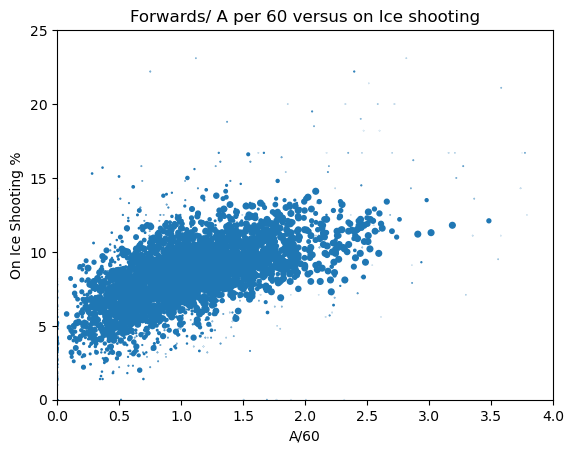

In [7]:
# lets see how my prediction about the function of team on Ice shooting percentage correlating with actual assists.

plt.scatter(forwards['A60'], forwards['TeamOnIceShootPerc'], s=np.square(forwards['GP'] / 20))
plt.xlabel('A/60')
plt.ylabel('On Ice Shooting %')
plt.title('Forwards/ A per 60 versus on Ice shooting')
plt.xlim(0, 4)
plt.ylim(0, 25)
plt.show()

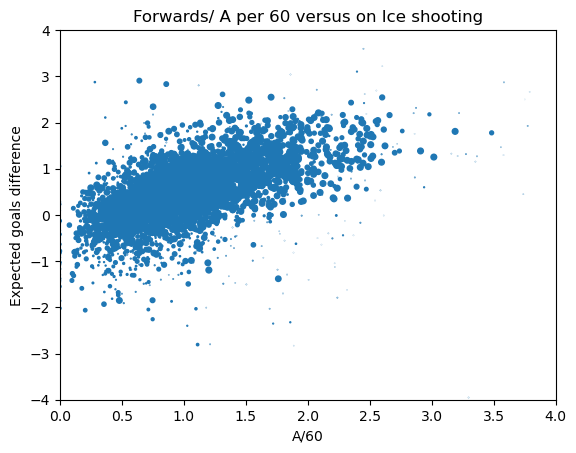

In [8]:
# what about the differential lets see what it looks like
plt.scatter(forwards['A60'], forwards['G-ExG-diff'], s=np.square(forwards['GP'] / 20))
plt.xlabel('A/60')
plt.ylabel('Expected goals difference')
plt.title('Forwards/ A per 60 versus on Ice shooting')
plt.xlim(0, 4)
plt.ylim(-4, 4)
plt.show()

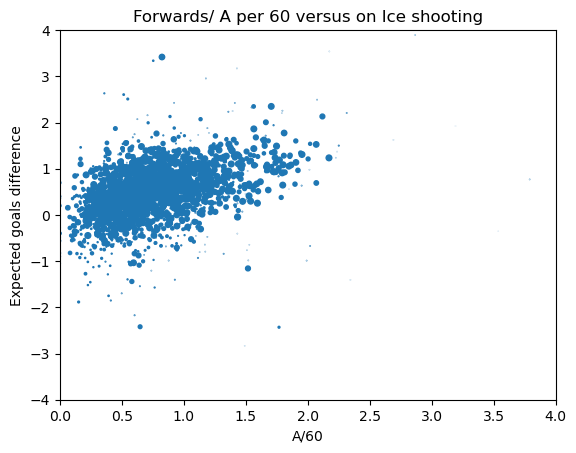

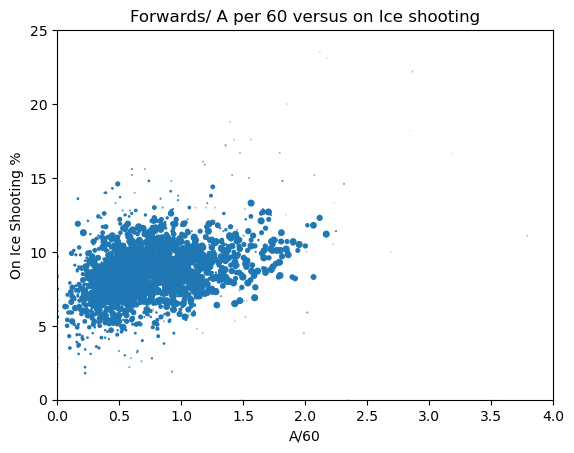

In [9]:
# lets do the same for defenceman
plt.scatter(defence['A60'], defence['G-ExG-diff'], s=np.square(defence['GP'] / 20))
plt.xlabel('A/60')
plt.ylabel('Expected goals difference')
plt.title('Forwards/ A per 60 versus on Ice shooting')
plt.xlim(0, 4)
plt.ylim(-4, 4)
plt.show()

plt.scatter(defence['A60'], defence['TeamOnIceShootPerc'], s=np.square(defence['GP'] / 20))
plt.xlabel('A/60')
plt.ylabel('On Ice Shooting %')
plt.title('Forwards/ A per 60 versus on Ice shooting')
plt.xlim(0, 4)
plt.ylim(0, 25)
plt.show()

In [10]:
forwards['A60'].describe()

count    4608.000000
mean        0.905568
std         0.651953
min         0.000000
25%         0.492053
50%         0.866276
75%         1.252937
max         7.121662
Name: A60, dtype: float64

In [11]:
forwards['G-ExG-diff'].describe()

count    4608.000000
mean        0.317293
std         1.223305
min       -13.584906
25%        -0.180259
50%         0.355810
75%         0.868748
max        37.713953
Name: G-ExG-diff, dtype: float64

In [12]:
forwards['ATOI'].describe()

count    4608.000000
mean      819.098524
std       220.191111
min        86.000000
25%       655.000000
50%       811.000000
75%       993.000000
max      1370.000000
Name: ATOI, dtype: float64

In [13]:
forwards['TeamOnIceShootPerc'].describe()

count    4593.000000
mean        7.816503
std         4.237925
min         0.000000
25%         6.200000
50%         8.100000
75%         9.600000
max       100.000000
Name: TeamOnIceShootPerc, dtype: float64

In [14]:
forwards['GFPer60'].describe()

count    4608.000000
mean        2.273090
std         1.346484
min         0.000000
25%         1.700000
50%         2.300000
75%         2.900000
max        41.900000
Name: GFPer60, dtype: float64

In [19]:
def logistic_curve(_25th: float, _75th: float, relative_sharpness=1.0):
    mean = (_25th + _75th)/2
    distance = (_75th - _25th)

    def sigmoid(x):
        return 1/(1+np.exp(-4 * relative_sharpness * distance * (x-mean)))


    return sigmoid

def forwards_passing(A60, exG_G_diff, atoi, team_on_ice_shooting, GF_60):
    stats = [A60, exG_G_diff, atoi, team_on_ice_shooting, GF_60]
    curves = [logistic_curve(0.3499, 0.8909),
              logistic_curve(-0.1802, 0.8687),
              logistic_curve(655, 993, 0.6),
              logistic_curve(6.2, 9.6),
              logistic_curve(1.7, 2.9)
              ]
    weights = [1, 0.7, 0.2, 0.5, 0.9]

    weight_sum = weights[0] + weights[1] + weights[2] + weights[3] + weights[4]

    return (curves[0](A60) * weights[0] + curves[1](exG_G_diff) * weights[1] + curves[2](atoi) * weights[2] + curves[3](team_on_ice_shooting) * weights[3] + curves[4](GF_60) * weights[4]) / weight_sum

print(forwards_passing(1, 0.7, 900, 9.7, 2.7))
print(forwards_passing(0.5, 0.7, 900, 9.7, 2.7))

print(forwards_passing(1, 0.7, 900, 9.7, 2.7))
print(forwards_passing(0.5, 0.7, 900, 9.7, 2.7))

0.8336350622477736
0.7550546412628908
0.8336350622477736
0.7550546412628908


In [20]:
forwards.loc[:, 'Passing Rating'] = forwards_passing(forwards[ 'A60'].values, forwards['G-ExG-diff'].values, forwards['ATOI'].values, forwards['TeamOnIceShootPerc'].values, forwards['GFPer60'].values)

/var/folders/vj/vb8pc7w56j1f0g_fxnwt5pzh0000gn/T/ipykernel_78713/1669556643.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-4 * relative_sharpness * distance * (x-mean)))


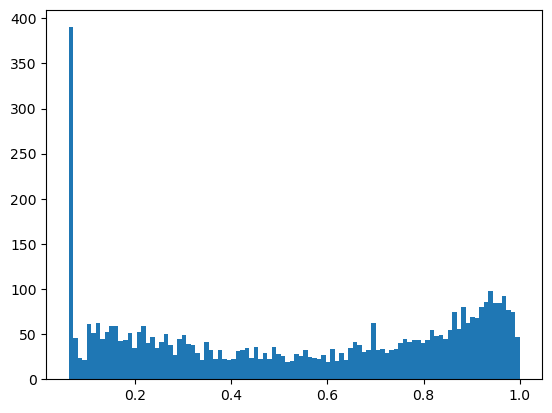

In [21]:
ratings = forwards["Passing Rating"]

dv.data_histogram(forwards, 'Passing Rating', 100)

In [32]:
forwards = forwards.dropna()

In [36]:
ratings = forwards['Passing Rating']

np.percentile(ratings, 50)


0.5607280657233172